In [213]:
class aa_information( ):
    def __init__(self, fname, TFW=False, ignore_vxc=False, aa_type='ZJ'):
        # Load header information
        fe_name = fname+"_electron_info.dat"
        fi_name = fname+"_IET_info.dat"
        
        with open(fe_name) as f:
            file_info = f.readlines()
    
        self.convergence_info = file_info[1]
        
        self.info_dict = dict(json.loads(file_info[2].strip("#")))
        info_dict = self.info_dict
        
        self.name  = info_dict['name']
        self.μ     = info_dict['μ[AU]']
        self.Z     = info_dict['Z']
        self.A     = info_dict['A']
        self.Zstar = info_dict['Zstar']
        self.Te     = info_dict['Te[AU]']
        self.Ti     = info_dict['Ti[AU]']
        self.rs    = info_dict['rs[AU]']
    
        # Load all data
        e_data = read_csv(fe_name, delim_whitespace=True, header=0, comment='#')
        i_data = read_csv(fi_name, delim_whitespace=True, header=0, comment='#')
        if aa_type=='ZJ':
            self.e_data = e_data
            self.ne   = e_data['ne[AU]']
            self.n_f  = e_data['nf[AU]']
            self.n_b  = e_data['nb[AU]']
            self.ni   = e_data['n_ion[AU]']
            self.φ    = e_data['φtot[AU]']
            self.vxc  = e_data['δVxc/δρ[Au]']
        if aa_type=='SS':
            self.e_data  = e_data
            self.ne_full = e_data['ne_full[AU]']
            self.ne_ion   = e_data['n_ion[AU]']
            self.ne_ext  = e_data['ne_ext[AU]']
            self.ne_PA   = e_data['ne_PA[AU]']
            self.ne_scr  = e_data['ne_scr[AU]']
            
            self.ne = self.ne_full
            self.nb = self.ne_ion
            self.nf = self.ne - self.nb
            
        
        self.Uei = i_data['U_ei[AU]']
        self.Uii = i_data['U_ii[AU]']
        self.gii = i_data['g_ii']
        
        self.xs_e = e_data['r[AU]']
        self.xs_i = i_data['r[AU]']
        self.R  = np.array(self.xs_e)[-1]
        self.N  = len(self.xs_e)

        # print(f"{self.name}: {self.convergence_info}")
        match = re.search(r'Err\(IET\)=([0-9.+-eE]+), Q_net', self.convergence_info)
        if match:
            self.iet_convergence = float(match.group(1))

def load_NS_g_data(filename):
    NS_aa = read_csv(filename, skiprows=4, delim_whitespace=True, names=["r", "g"])
    
    return NS_aa.r, NS_aa.g
NS_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_NS/"

# Fixed Ti cases
NS_tf_g11 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g11 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g12 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g12 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g13 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g13 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g14 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g14 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

# Fixed Te cases
NS_tf_g21 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g21 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g22 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g22 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g23 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g23 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

NS_tf_g24 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/tf_ii_pdfs.dat")
NS_ks_g24 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")


In [243]:
ZJ_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_ZJ/chi_TF"
ZJ_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_ZJ/Al_2T_2024-08-01_KSDT_xc/chi_Lindhard"

aa_string  = 'AA_TFD_R3.0e+00'
npa_string = 'NPA_TFD_R3.0e+01'
SS_string  = 'CS2014_R3.0e+01' 
aa_type_info = SS_string
aa_load_type='SS'

ZJ_aa_11 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te1.0e+00eV_Ti1.0e+00eV", aa_type=aa_load_type)
ZJ_g11 = ZJ_aa_11.xs_i, ZJ_aa_11.gii 
ZJ_aa_12 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te3.0e+00eV_Ti1.0e+00eV", aa_type=aa_load_type)
ZJ_g12 = ZJ_aa_12.xs_i, ZJ_aa_12.gii 
ZJ_aa_13 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te1.0e+01eV_Ti1.0e+00eV", aa_type=aa_load_type)
ZJ_g13 = ZJ_aa_13.xs_i, ZJ_aa_13.gii 
ZJ_aa_14 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te3.0e+01eV_Ti1.0e+00eV", aa_type=aa_load_type)
ZJ_g14 = ZJ_aa_14.xs_i, ZJ_aa_14.gii 

ZJ_aa_21 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te3.0e+01eV_Ti1.0e+00eV", aa_type=aa_load_type)
ZJ_g21 = ZJ_aa_21.xs_i, ZJ_aa_21.gii 
ZJ_aa_22 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te3.0e+01eV_Ti3.0e+00eV", aa_type=aa_load_type)
ZJ_g22 = ZJ_aa_22.xs_i, ZJ_aa_22.gii 
ZJ_aa_23 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te3.0e+01eV_Ti1.0e+01eV", aa_type=aa_load_type)
ZJ_g23 = ZJ_aa_23.xs_i, ZJ_aa_23.gii 
ZJ_aa_24 = aa_information(ZJ_folder + f"/Al_{aa_type_info}_rs3.0e+00_Te3.0e+01eV_Ti3.0e+01eV", aa_type=aa_load_type)
ZJ_g24 = ZJ_aa_24.xs_i, ZJ_aa_24.gii 

In [244]:
QE_11 = read_csv("/home/zach/plasma/average_atom/data/aluminum_2T/QE_Output/Al60_Ti11604.52501_Te0.073499_L18.87210_dt16.67060910018252_240716.nve_0.gofr", delim_whitespace=True, header=0)
QE_g11 = np.array(QE_11['r[AU]']), np.array(QE_11['g(r)'])
QE_12 = read_csv("/home/zach/plasma/average_atom/data/aluminum_2T/QE_Output/Al60_Ti11604.52501_Te0.22050_L18.87210_dt16.039367306143422_240716.nve_0.gofr", delim_whitespace=True, header=0)
QE_g12 = QE_12['r[AU]'], QE_12['g(r)']
QE_13 = read_csv("/home/zach/plasma/average_atom/data/aluminum_2T/QE_Output/Al60_Ti11604.52501_Te0.73499_L18.87210_dt13.881434832082252_240720.nve_0.gofr", delim_whitespace=True, header=0)
QE_g13 = QE_13['r[AU]'], QE_13['g(r)']

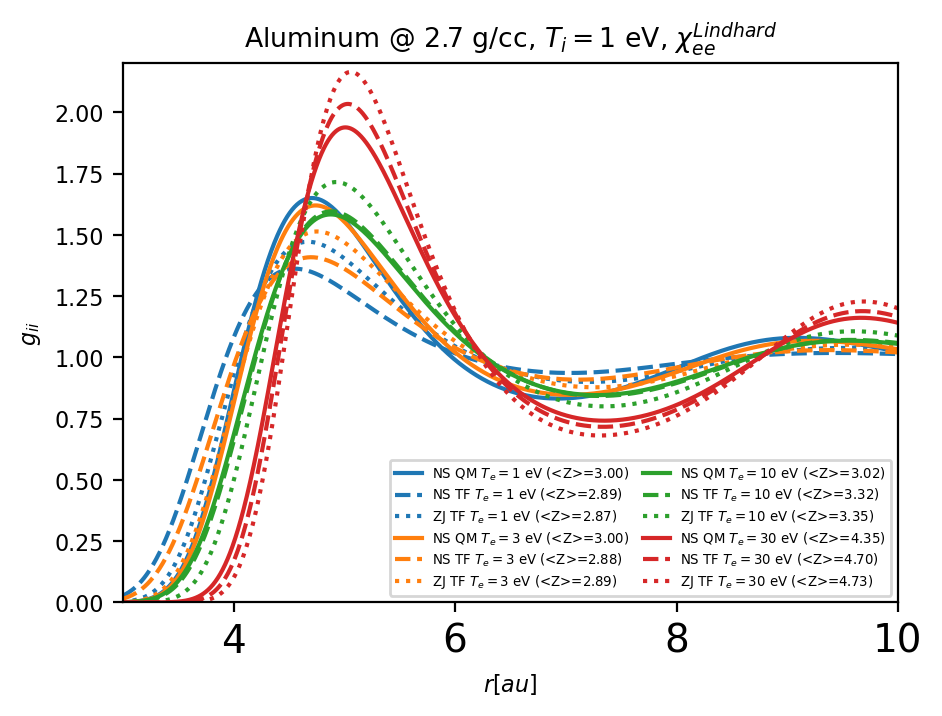

In [246]:
def plot_gii(gii_data, figax = None, **kwargs):#line = None, color=None, label=None):
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax  = figax
    
    ax.plot(gii_data[0], gii_data[1], **kwargs )#, linestyle=line, color=color, label=label)
    
    ax.set_xlim(0,15)
    ax.set_xlim(3,10)
    ax.set_ylim(0,2.2)
    
    ax.set_ylabel(r"$g_{ii}$")
    ax.set_xlabel(r"$r [au]$")
    
    ax.legend(fontsize=4.8, ncols=2, labelspacing=0.3, columnspacing=1)
    
# Fixed Ti
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV, $\chi_{ee}^{Lindhard}$")

plot_gii(NS_ks_g11, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM $T_e=1$ eV (<Z>=3.00)")
plot_gii(NS_tf_g11, figax = (fig, ax), color=color_cycle[0], linestyle='--', label=r"NS TF $T_e=1$ eV (<Z>=2.89)")
plot_gii(ZJ_g11, figax = (fig, ax), color=color_cycle[0], linestyle=':', label=r"ZJ TF $T_e=1$ eV (<Z>={:0.2f})".format(ZJ_aa_11.Zstar))
# plot_gii(QE_g11, figax = (fig, ax), color=color_cycle[0], marker='+', linestyle='', label=r"QE $T_e=1$ eV ")

plot_gii(NS_ks_g12, figax = (fig, ax), color=color_cycle[1], linestyle='-', label=r"NS QM $T_e=3$ eV (<Z>=3.00)")
plot_gii(NS_tf_g12, figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"NS TF $T_e=3$ eV (<Z>=2.88)")
plot_gii(ZJ_g12, figax = (fig, ax), color=color_cycle[1], linestyle=':', label=r"ZJ TF $T_e=3$ eV (<Z>={:0.2f})".format(ZJ_aa_12.Zstar))
# plot_gii(QE_g12, figax = (fig, ax), color=color_cycle[1], marker='+', linestyle='', label=r"QE $T_e=3$ eV ")


plot_gii(NS_ks_g13, figax = (fig, ax), color=color_cycle[2], linestyle='-', label=r"NS QM $T_e=10$ eV (<Z>=3.02)")
plot_gii(NS_tf_g13, figax = (fig, ax), color=color_cycle[2], linestyle='--', label=r"NS TF $T_e=10$ eV (<Z>=3.32)")
plot_gii(ZJ_g13, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF $T_e=10$ eV (<Z>={:0.2f})".format(ZJ_aa_13.Zstar))
# plot_gii(QE_g13, figax = (fig, ax), color=color_cycle[2], marker='+', linestyle='', label=r"QE $T_e=10$ eV ")

plot_gii(NS_ks_g14, figax = (fig, ax), color=color_cycle[3], linestyle='-', label=r"NS QM $T_e=30$ eV (<Z>=4.35)")
plot_gii(NS_tf_g14, figax = (fig, ax), color=color_cycle[3], linestyle='--', label=r"NS TF $T_e=30$ eV (<Z>=4.70)")
plot_gii(ZJ_g14, figax = (fig, ax), color=color_cycle[3], linestyle=':', label=r"ZJ TF $T_e=30$ eV (<Z>={:0.2f})".format(ZJ_aa_14.Zstar))
plt.savefig("KS_AlTi1eV_NS_comparison.png", dpi=200)

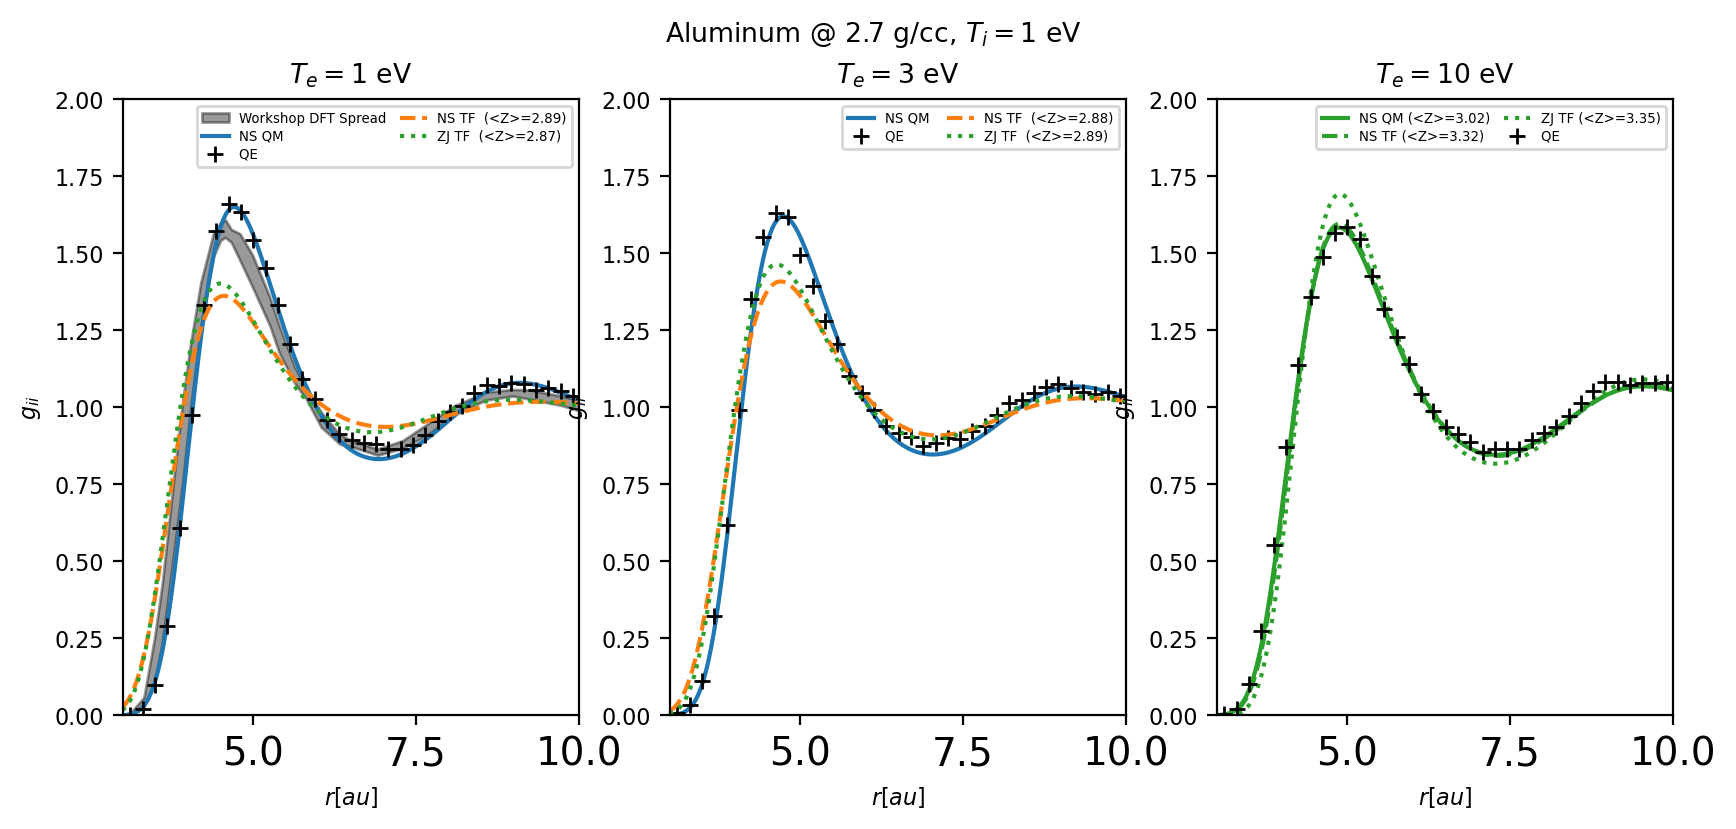

In [234]:
from scipy.interpolate import PchipInterpolator

# Fixed Ti
fig, axs = plt.subplots(1,3, figsize=(10,4))
fig.suptitle(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV")

ax = axs[0]
ax.set_title(r"$T_e = 1 $ eV")
# Data from community TCCW
upper_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Upper.txt", delim_whitespace=True, header=1)
lower_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Lower.txt", delim_whitespace=True, header=1)
ax.fill_between(lower_data['r/ri']*ZJ_aa_11.rs,lower_data['gii'], PchipInterpolator(upper_data['r/ri'], upper_data['gii'])(lower_data['r/ri']), alpha=0.4, color='k', label='Workshop DFT Spread')

plot_gii(NS_ks_g11, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM ")
plot_gii(QE_g11, figax = (fig, ax), color='k', marker='+', linestyle='', label=r"QE ")
plot_gii(NS_tf_g11, figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"NS TF  (<Z>=2.89)")
plot_gii(ZJ_g11, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF  (<Z>={:0.2f})".format(ZJ_aa_11.Zstar))


ax = axs[1]
ax.set_title(r"$T_e = 3 $ eV")
plot_gii(NS_ks_g12, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM ")
plot_gii(QE_g12, figax = (fig, ax), color='k', marker='+', linestyle='', label=r"QE  ")
plot_gii(NS_tf_g12, figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"NS TF  (<Z>=2.88)")
plot_gii(ZJ_g12, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF  (<Z>={:0.2f})".format(ZJ_aa_12.Zstar))
plt.savefig("KS_AlTi1eV_NS_comparison_all.png", dpi=200)

ax = axs[2]
ax.set_title(r"$T_e = 10 $ eV")
plot_gii(NS_ks_g13, figax = (fig, ax), color=color_cycle[2], linestyle='-', label=r"NS QM (<Z>=3.02)")
plot_gii(NS_tf_g13, figax = (fig, ax), color=color_cycle[2], linestyle='--', label=r"NS TF (<Z>=3.32)")
plot_gii(ZJ_g13, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF (<Z>={:0.2f})".format(ZJ_aa_13.Zstar))
plot_gii(QE_g13, figax = (fig, ax), color='k', marker='+', linestyle='', label=r"QE  ")
plt.savefig("KS_AlTi1eV_NS_comparison_all.png", dpi=200)

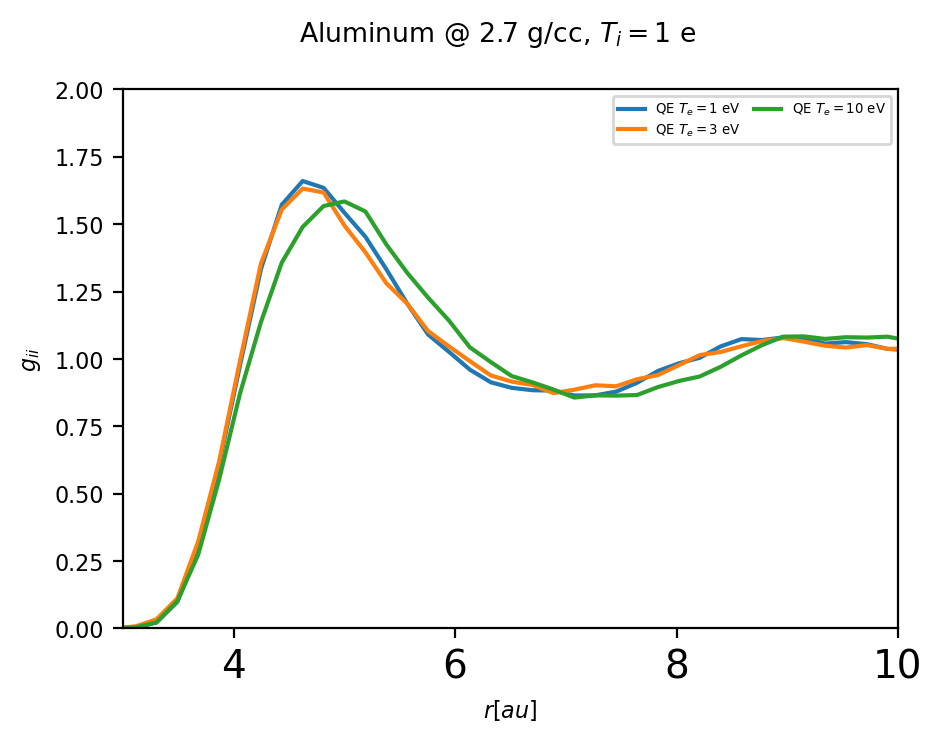

In [235]:
# Fixed Ti
fig, ax = plt.subplots(1,1)#, figsize=(8,4))
fig.suptitle(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ e")

plot_gii(QE_g11, figax = (fig, ax), marker='', linestyle='-', label=r"QE $T_e = 1 $ eV")
plot_gii(QE_g12, figax = (fig, ax), marker='', linestyle='-', label=r"QE $T_e = 3 $ eV")
plot_gii(QE_g13, figax = (fig, ax), marker='', linestyle='-', label=r"QE $T_e = 10 $ eV")


(1.0, 10.0)

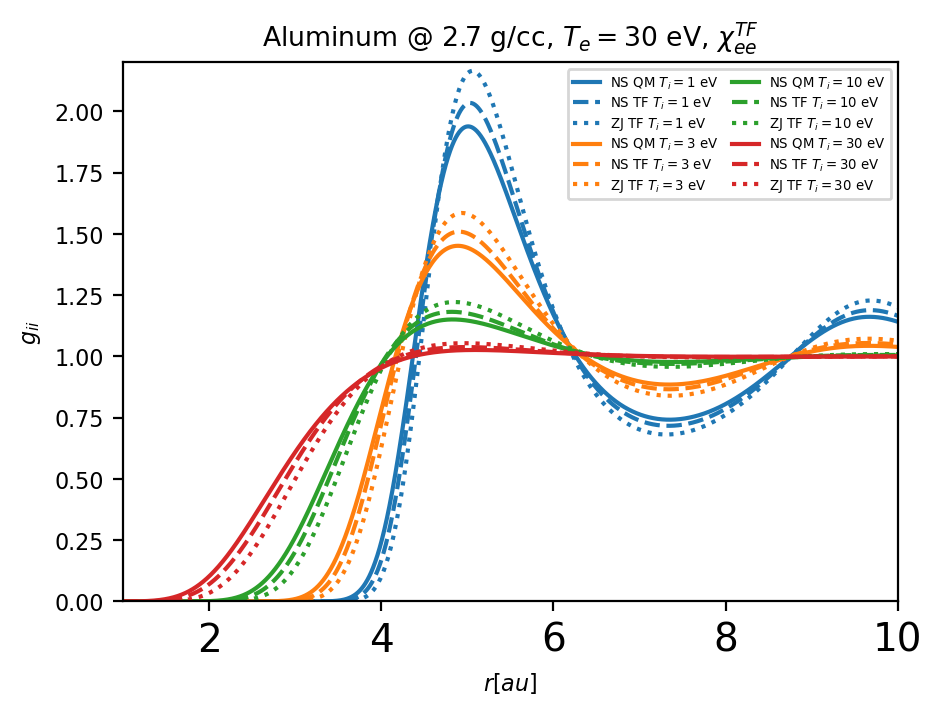

In [247]:
# Fixed Te
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_e = 30 $ eV, $\chi_{ee}^{TF}$")

plot_gii(NS_ks_g21, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM $T_i=1$ eV")
plot_gii(NS_tf_g21, figax = (fig, ax), color=color_cycle[0], linestyle='--', label=r"NS TF $T_i=1$ eV")
plot_gii(ZJ_g21, figax = (fig, ax), color=color_cycle[0], linestyle=':', label=r"ZJ TF $T_i=1$ eV")

plot_gii(NS_ks_g22, figax = (fig, ax), color=color_cycle[1], linestyle='-', label=r"NS QM $T_i=3$ eV")
plot_gii(NS_tf_g22, figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"NS TF $T_i=3$ eV")
plot_gii(ZJ_g22, figax = (fig, ax), color=color_cycle[1], linestyle=':', label=r"ZJ TF $T_i=3$ eV")

plot_gii(NS_ks_g23, figax = (fig, ax), color=color_cycle[2], linestyle='-', label=r"NS QM $T_i=10$ eV")
plot_gii(NS_tf_g23, figax = (fig, ax), color=color_cycle[2], linestyle='--', label=r"NS TF $T_i=10$ eV")
plot_gii(ZJ_g23, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF $T_i=10$ eV")

plot_gii(NS_ks_g24, figax = (fig, ax), color=color_cycle[3], linestyle='-', label=r"NS QM $T_i=30$ eV")
plot_gii(NS_tf_g24, figax = (fig, ax), color=color_cycle[3], linestyle='--', label=r"NS TF $T_i=30$ eV")
plot_gii(ZJ_g24, figax = (fig, ax), color=color_cycle[3], linestyle=':', label=r"ZJ TF $T_i=30$ eV")
ax.set_xlim(1,10)


## Number Density

In [229]:
def column_cleaning(frame):
    frame.columns = np.roll(frame.columns, len(frame.columns)-1)
    return frame.dropna(how='all', axis=1)

def load_NS_ne_tf_data(filename, ne_type='full'):
    NS_aa = read_csv(filename, skiprows=3, delim_whitespace=True, escapechar="#")#, names=["r", "g"])
    column_cleaning(NS_aa)
    if ne_type=='full':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['nefull'])
    elif ne_type=='bound':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ion'])
    elif ne_type=='empty':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['neext'])
    elif ne_type=='free':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['nefull'])-np.array(NS_aa['ne_ion'])
    elif ne_type=='screen':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_scr'])

def load_NS_ne_ks_data(filename, ne_type='full'):
    NS_aa = read_csv(filename, skiprows=4, delim_whitespace=True, escapechar="#")#, names=["r", "g"])
    column_cleaning(NS_aa)
    if ne_type=='full':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_full'])
    elif ne_type=='bound':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ion'])
    elif ne_type=='empty':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ext'])
    elif ne_type=='free':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_full'])-np.array(NS_aa['ne_ion'])
    elif ne_type=='screen':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_scr'])


NS_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_NS/"

ne_type = 'screen'

# Fixed Ti cases
NS_tf_ne11 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne11 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne12 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne12 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne13 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne13 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne14 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne14 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

# Fixed Te cases
NS_tf_ne21 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne21 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne22 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne22 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne23 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne23 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne24 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne24 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

# Mine
ZJ_ne11 = ZJ_aa_11.xs_e, ZJ_aa_11.ne_scr 
ZJ_ne12 = ZJ_aa_12.xs_e, ZJ_aa_12.ne_scr 
ZJ_ne13 = ZJ_aa_13.xs_e, ZJ_aa_13.ne_scr 
ZJ_ne14 = ZJ_aa_14.xs_e, ZJ_aa_14.ne_scr 
ZJ_ne21 = ZJ_aa_21.xs_e, ZJ_aa_21.ne_scr 
ZJ_ne22 = ZJ_aa_22.xs_e, ZJ_aa_22.ne_scr 
ZJ_ne23 = ZJ_aa_23.xs_e, ZJ_aa_23.ne_scr 
ZJ_ne24 = ZJ_aa_24.xs_e, ZJ_aa_24.ne_scr 

# ZJ_ne11 = ZJ_aa_11.xs_e, ZJ_aa_11.n_b 
# ZJ_ne12 = ZJ_aa_12.xs_e, ZJ_aa_12.n_b 
# ZJ_ne13 = ZJ_aa_13.xs_e, ZJ_aa_13.n_b 
# ZJ_ne14 = ZJ_aa_14.xs_e, ZJ_aa_14.n_b 
# ZJ_ne21 = ZJ_aa_21.xs_e, ZJ_aa_21.n_b 
# ZJ_ne22 = ZJ_aa_22.xs_e, ZJ_aa_22.n_b 
# ZJ_ne23 = ZJ_aa_23.xs_e, ZJ_aa_23.n_b 
# ZJ_ne24 = ZJ_aa_24.xs_e, ZJ_aa_24.n_b 

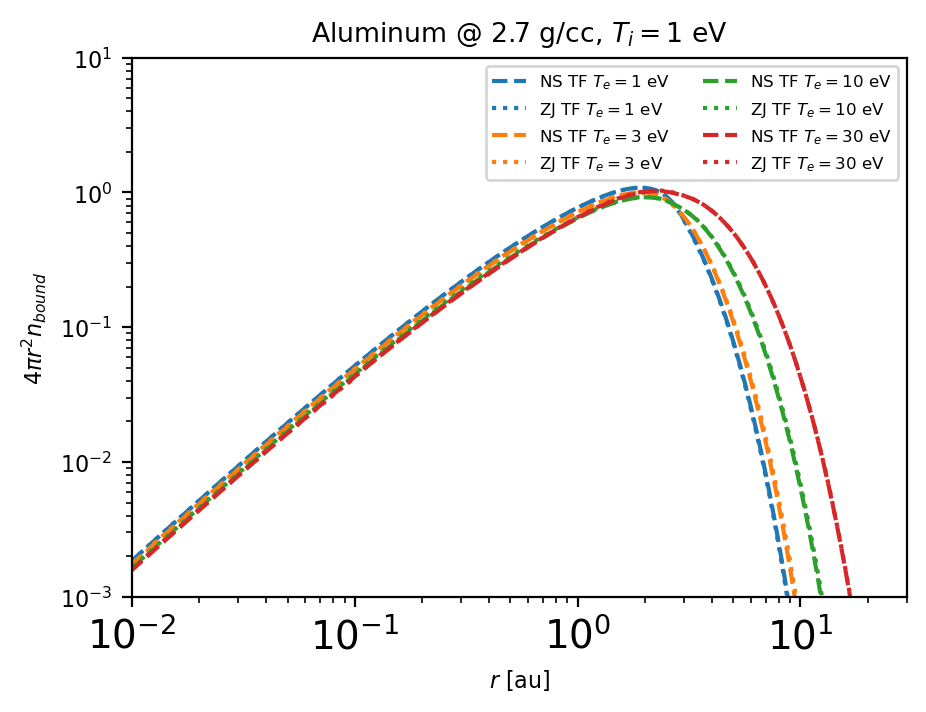

In [238]:
def plot_ne(ne_data, ks=False, figax = None, **kwargs):#line = None, color=None, label=None):
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax  = figax
    
    fourpi = True
    if fourpi==True:
        if ks==False:
            ax.plot(ne_data[0], 4*π*ne_data[0]**2*ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        else:
            ax.plot(ne_data[0], ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        ax.set_ylabel(r"$4 \pi  r^2 n_{bound}$")        
    else:
        if ks==False:
            ax.plot(ne_data[0], ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        else:
            ax.plot(ne_data[0], (4*π*ne_data[0]**2)**-1*ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        ax.set_ylabel(r"$n_{free} $ [au]")        

    if False:
        ax.set_xlim(0,3)
        ax.set_ylim(0, 13)
    else:
        ax.set_xlim(1e-2,30)
        ax.set_yscale('log')#, linthresh=1e-3)
        ax.set_xscale('log')
        ax.set_ylim(1e-3, 1e1)

    
    ax.set_xlabel(r"$r $ [au]")
    
    ax.legend(fontsize=6, ncols=2)
    
# Fixed Ti
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV")

# plot_ne(NS_ks_ne11, ks=True, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM $T_e=1$ eV")
plot_ne(NS_tf_ne11, ks=False, figax = (fig, ax), color=color_cycle[0], linestyle='--', label=r"NS TF $T_e=1$ eV")
plot_ne(ZJ_ne11, figax = (fig, ax), color=color_cycle[0], linestyle=':', label=r"ZJ TF $T_e=1$ eV")

# plot_ne(NS_ks_ne12, ks=True, figax = (fig, ax), color=color_cycle[1], linestyle='-', label=r"NS QM $T_e=3$ eV")
plot_ne(NS_tf_ne12, ks=False,  figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"NS TF $T_e=3$ eV")
plot_ne(ZJ_ne12, figax = (fig, ax), color=color_cycle[1], linestyle=':', label=r"ZJ TF $T_e=3$ eV")

# plot_ne(NS_ks_ne13, ks=True, figax = (fig, ax), color=color_cycle[2], linestyle='-', label=r"NS QM $T_e=10$ eV")
plot_ne(NS_tf_ne13, ks=False,  figax = (fig, ax), color=color_cycle[2], linestyle='--', label=r"NS TF $T_e=10$ eV")
plot_ne(ZJ_ne13, figax = (fig, ax), color=color_cycle[2], linestyle=':', label=r"ZJ TF $T_e=10$ eV")

# plot_ne(NS_ks_ne14, ks=True, figax = (fig, ax), color=color_cycle[3], linestyle='-', label=r"NS QM $T_e=30$ eV")
plot_ne(NS_tf_ne14, ks=False,  figax = (fig, ax), color=color_cycle[3], linestyle='--', label=r"NS TF $T_e=30$ eV")
plot_ne(ZJ_ne14, figax = (fig, ax), color=color_cycle[3], linestyle=':', label=r"ZJ TF $T_e=30$ eV")


In [222]:
np.argmin( np.abs(NS_tf_ne14[0]-2.99)), NS_tf_ne14[0][16370]

(16370, 2.9898632374)